In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("..")
print(os.getcwd())
pd.options.display.max_rows = None

F:\python-projects\child-support-opt


# inicial

In [21]:
fcp = "EC0182"
month = "m1"

In [22]:
balance = pd.read_excel("data/processed/final/balance.xlsx")
balance["account"] = balance["account"].astype(str)
balance.head(5)

,account,description,before,debe,haber,diff,month,fcpId
0,1,ACTIVO TOTAL DE LA FCP,6071.94,3835.71,3890.94,6016.71,m1,EC0107
1,11,ACTIVO CORRIENTE,3073.11,3835.71,3849.97,3058.85,m1,EC0107
2,111,ACTIVO DISPONIBLE,3001.43,3835.71,3849.97,2987.17,m1,EC0107
3,11101,Caja - PATROCINIO,76.67,1700.19,1758.97,17.89,m1,EC0107
4,11102,Cuenta bancaria - PATROCINIO,2924.76,2135.52,2091.00,2969.28,m1,EC0107


In [23]:
income = balance[
    (balance["fcpId"] == fcp) & (balance["month"] == month) & (balance["account"] == "4")
].copy()
income = income[["account", "description", "haber"]]
income

,account,description,haber
43885,4,INGRESO TOTAL DE LA FCP,7682.8


In [24]:
expenses = balance[
    (balance["fcpId"] == fcp) & (balance["month"] == month) & (balance["account"] == "5")
].copy()
expenses = expenses[["account", "description", "debe"]]
expenses

,account,description,debe
43924,5,GASTO TOTAL DE LA FCP,5787.51


In [25]:
poa = pd.read_excel("data/processed/final/poa.xlsx")
poa["account"] = poa["account"].astype(str)
poa.head(5)

,activity,group,account,fcpId,month,value
0,OFRENDA PASTOR,Todos\All,51301,EC0107,m1,110.0
1,"TALLERES DE EVANGELISMO, DISCIPULADO Y CON...",Todos\All,51304,EC0107,m1,0.0
2,MATERIALES PARA ACTIVIDADES ESPIRITUALES,Todos\All,51303,EC0107,m1,0.0
3,CAMPAMENTO EVANGELISTICO,Todos\All,51304,EC0107,m1,50.0
4,TUTOR VOLUNTARIOS 1,Todos\All,51101,EC0107,m1,280.0


In [30]:
proyected = poa[
    (poa["fcpId"] == fcp) & (poa["month"] == month) & (poa["account"].str.startswith("5"))
].copy()
proyected = proyected[["account", "activity", "value"]]
print(proyected["value"].sum())

6848.0


# otro

In [18]:
results = pd.read_excel("data/processed/final/solutions.xlsx")
results["diff"] = results["opt_kids"] - results["current_kids"]
# results = results[(results["diff"] <= 50) & (results["diff"] >= -200)]
results = results.sort_values(by="diff")
colors = ['positivo' if x > 0 else 'negativo' for x in results['diff']]
results['diff_sign'] = colors
results["diferencia"] = abs(results["diff"])

In [19]:
results.head()

,fcp,budget,current_kids,opt_kids,expenses,opt_expenses,diff,diff_sign,diferencia
28,EC0261,490745.46,1564,1000,445228.26,284672.800512,-564,negativo,564
22,EC0226,35722.20,769,712,36640.11,33924.263095,-57,negativo,57
10,EC0150,83006.09,204,162,98884.97,78526.299706,-42,negativo,42
20,EC0183,186628.47,644,605,188662.35,177237.145575,-39,negativo,39
11,EC0151,120995.07,361,326,127188.04,114856.789584,-35,negativo,35


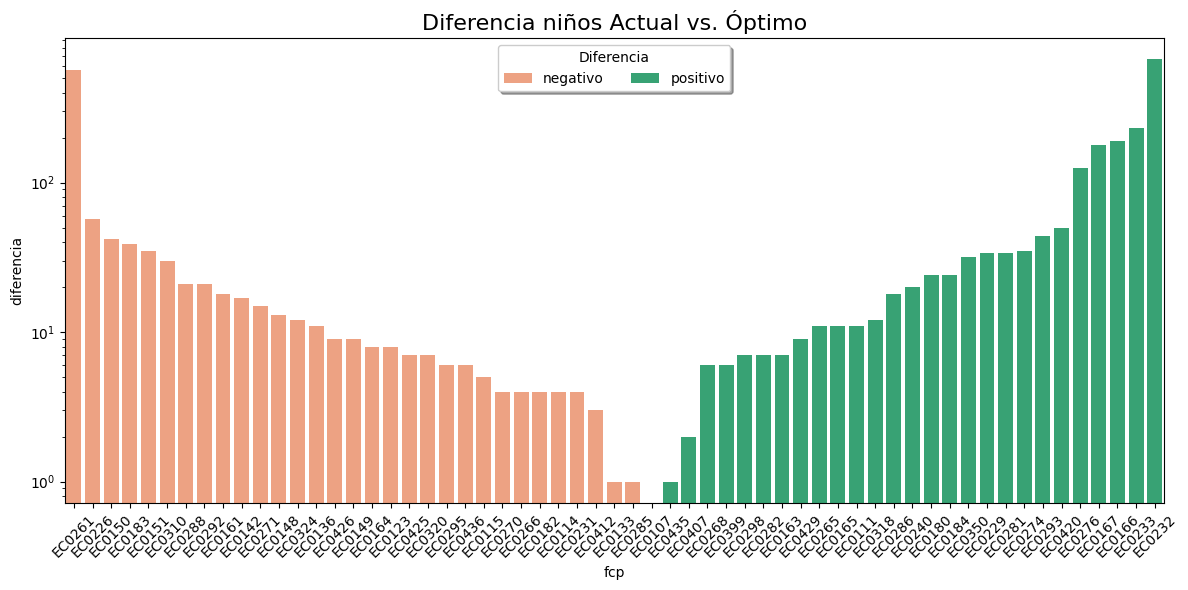

In [21]:
palette = {"positivo": "#26b476", "negativo": "#FF9B71"}

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="fcp", y="diferencia", hue="diff_sign", palette=palette)
plt.title("Diferencia niños Actual vs. Óptimo", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yscale("log")
plt.legend(title='Diferencia', loc='upper center',
           ncol=2, shadow=True, frameon=True)
plt.tight_layout()
plt.show()